**Group #27's Project Proposal for DSCI 100 Sect.002**

Ella Woolcott, Nylah Grewal, Anoushka Gautam, Loveleen Chandi

**Predicting Diagnosis of Heart Disease Based on Physical Indicator Variables**

**Introduction**

Heart disease is a general term used to describe multiple medical conditions relating to the heart. Analyzing data relating to heart disease can have broad applications in public health and medicine, as heart disease is a leading cause of death. Symptoms of heart disease include chest pains, heart palpitations, and clogged blood vessels. Risk factors include high blood pressure and cholesterol. These variables are observed in the data set…upon wrangling the data, we may observe relationships between the patient’s symptoms and outcome/diagnosis.

The predictive question we are going to answer is:
What variables give the most reliable and accurate predictor outcome? 

The heart disease data set we have chosen to analyze comes from a machine learning repository and contains 4 databases from Cleveland, Long Beach, Hungary, and Switzerland. The dataset contains a lot of medical terminology, as shown in the table of 14 variables. The possible observations for each variable in the data set are categorical, integer, or numerical values.


| Atrribute Number | Varible | Observations Possible | Definition | 
|  :----: |    :----:   |  :----:  |  :----:  |
| 1     | age       | numerical value  | number in years |
| 2   | sex        | 1 = male; 0 = female      |self-explanatory      |
| 3   | chest_pain | Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic     |chest pain type |
| 4   | resting_blood_pressure        | in mm Hg on admission to the hospital     |resting blood pressure  |
| 5   | cholesterol        |  in mg/dl     |serum cholesterol       |
| 6   | fasting_blood_sugar        | 1 = presence of diabetes (or blood sugar of >120mg/dl) and 0 = absence of diabetes (or blood sugar of <120mg/dl)    |fasting blood sugar > 120 mg/dl      |
| 7   | rest_ecg        |Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria      |resting electrocardiographic results    |
| 8   | max_heart_rate       | numerical value      |maximum heart rate achieved   |
| 9   | exercise_induced_angina        | (1 = yes; 0 = no)      |exercise induced angina      |
| 10   | oldpeak        | numerical value     |ST depression induced by exercise relative to rest      |
| 11  | ST_slope        | Value 1: upsloping, Value 2: flat, Value 3: downsloping      |the slope of the peak exercise ST segment     |
| 12   | thalassemia        |3 = normal; 6 = fixed defect; 7 = reversible defect       |A blood disorder called thalassemia      |
| 13  | diagnosis        | Value 0: < 50% diameter, Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels), meaning 0 = absence of heart disease while 1 = presence of heart disease      |diagnosis of heart disease (angiographic disease status)      |

**Methods and Results**

In [1]:
install.packages("leaps")
library(tidyverse)
library(repr)
library(tidymodels)
library(leaps)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

**Step 1:** 
Demonstrate that the dataset can be read from the web into R

In [2]:
heart_data<- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE)
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Step 2:**
Clean and wrangle your data into a tidy format

In [3]:
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_slope", "num_major_vessels", "thalassemia", "diagnosis")
colnames(heart_data)
heart_data_clean <- heart_data[c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_slope", "thalassemia", "diagnosis")]
nrow(heart_data_clean)
heart_data_clean

[1] "age"                     "sex"                    
 [3] "chest_pain"              "resting_blood_pressure" 
 [5] "cholesterol"             "fasting_blood_sugar"    
 [7] "rest_ecg"                "max_heart_rate"         
 [9] "exercise_induced_angina" "ST_depression"          
[11] "ST_slope"                "num_major_vessels"      
[13] "thalassemia"             "diagnosis"

[1] 303

age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
63,1,1,145,233,1,2,150,0,3,6.0,0
67,1,4,160,286,0,2,108,1,2,3.0,2
67,1,4,120,229,0,2,129,1,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,2,7.0,3
57,0,2,130,236,0,2,174,0,2,3.0,1
38,1,3,138,175,0,0,173,0,1,3.0,0


**Step 3:** 
Convert necessary columns to factors

In [4]:
heart_data_clean$sex <- as.factor(heart_data_clean$sex)
heart_data_clean$chest_pain <- as.factor(heart_data_clean$chest_pain)
heart_data_clean$fasting_blood_sugar <- as.factor(heart_data_clean$fasting_blood_sugar)
heart_data_clean$rest_ecg <- factor(heart_data_clean$rest_ecg, levels = c("0", "1", "2"))
heart_data_clean$exercise_induced_angina <- as.factor(heart_data_clean$exercise_induced_angina)
heart_data_clean$ST_slope <- as.factor(heart_data_clean$ST_slope)
heart_data_clean$thalassemia <- factor(heart_data_clean$thalassemia, levels = c("3", "6", "7"))

heart_data_clean$diagnosis[heart_data_clean$diagnosis == 0] <- 0
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 1] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 2] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 3] <- 1
heart_data_clean$diagnosis[heart_data_clean$diagnosis == 4] <- 1
heart_data_clean$diagnosis <- as.factor(heart_data_clean$diagnosis)

heart_data_clean$diagnosis
heart_data_clean

[1] 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 [38] 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 [75] 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
[112] 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0
[149] 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
[186] 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0
[223] 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
[260] 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
[297] 1 1 1 1 1 1 0
Levels: 0 1

age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_slope,thalassemia,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,3,NA,0
67,1,4,160,286,0,2,108,1,2,NA,1
67,1,4,120,229,0,2,129,1,2,NA,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,2,NA,1
57,0,2,130,236,0,2,174,0,2,NA,1
38,1,3,138,175,0,0,173,0,1,NA,0


**Step 4:** 
Split into training and testing data

In [5]:
set.seed(20)
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

**Step 5:** Predictor Selection - select relevant columns as predictor variables

In [6]:
set.seed(20)
heart_data_select <- heart_train |>
    mutate(diagnosis = as.numeric(diagnosis))|>
    select(-thalassemia)

**Step 6:**
Perform feature selection using a model

In [7]:
lm1 <- lm(heart_data_select,formula=diagnosis ~.)
summary(lm1)


Call:
lm(formula = diagnosis ~ ., data = heart_data_select)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99558 -0.24019  0.00302  0.23696  0.93151 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.3122762  0.3801506   0.821 0.412311    
age                       0.0043893  0.0032296   1.359 0.175571    
sex1                      0.2619880  0.0585181   4.477 1.24e-05 ***
chest_pain2               0.0456387  0.1107429   0.412 0.680672    
chest_pain3               0.0372372  0.1004071   0.371 0.711110    
chest_pain4               0.3839245  0.0991471   3.872 0.000144 ***
resting_blood_pressure    0.0031256  0.0015316   2.041 0.042518 *  
cholesterol               0.0004895  0.0005269   0.929 0.354007    
fasting_blood_sugar1     -0.0048510  0.0737881  -0.066 0.947645    
rest_ecg1                 0.1414254  0.1997870   0.708 0.479797    
rest_ecg2                 0.0610996  0.0537215   1.137 0.256680    
max_

**Step 7:** Obtain feature importance

In [8]:
Best_Subset <-
    regsubsets(diagnosis~.,
               data =heart_data_select,
               nbest = 1,      # 1 best model for each number of predictors
               nvmax = NULL,    # NULL for no limit on number of variables
               force.in = NULL, force.out = NULL,
               method = "exhaustive")

summary_best_subset <- summary(Best_Subset)
as.data.frame(summary_best_subset$outmat)

,age,sex1,chest_pain2,chest_pain3,chest_pain4,resting_blood_pressure,cholesterol,fasting_blood_sugar1,rest_ecg1,rest_ecg2,max_heart_rate,exercise_induced_angina1,ST_slope2,ST_slope3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1 ( 1 ),,,,,*,,,,,,,,,
2 ( 1 ),,,,,*,,,,,,,,*,
3 ( 1 ),,*,,,*,,,,,,,,*,
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
12 ( 1 ),*,*,*,,*,*,*,,*,*,*,*,*,*
13 ( 1 ),*,*,*,*,*,*,*,,*,*,*,*,*,*
14 ( 1 ),*,*,*,*,*,*,*,*,*,*,*,*,*,*


**Step 8:** Find best number of predictors

In [9]:
which.max(summary_best_subset$adjr2)

[1] 7

**Step 9:** 
Select best 6 predictors

In [10]:
print(summary_best_subset$which[7,])

             (Intercept)                      age                     sex1 
                    TRUE                     TRUE                     TRUE 
             chest_pain2              chest_pain3              chest_pain4 
                   FALSE                    FALSE                     TRUE 
  resting_blood_pressure              cholesterol     fasting_blood_sugar1 
                    TRUE                    FALSE                    FALSE 
               rest_ecg1                rest_ecg2           max_heart_rate 
                   FALSE                     TRUE                    FALSE 
exercise_induced_angina1                ST_slope2                ST_slope3 
                    TRUE                     TRUE                    FALSE 


The 6 best predictors with the most important coefficents are: Rest ECG, ST Slope, Chest Pain, Fasting Blood Sugar, Age, Max_Heart_Rate. 

The model we used to get feature importance looked at each class within the predictors not the predictors as a whole. So when selecting our predictors we expanded the list until we had 6 seperate catergories named as we are filtering our data for the entire predictor subset, not specific predictor classes. 

**Step 10:** 
Summary of training data set containing 6 best predictors

In [25]:
#count of factor predictor variables (fasting blood sugar, rest ECG, ST slope, and chest pain) and target variable (diagnosis)
count_diag <- heart_train|>
    count(diagnosis)
count_diag

diagnosis,n
<fct>,<int>
0,123
1,104


In [26]:
count_sugar <- heart_train|>
    count(fasting_blood_sugar)
count_sugar

fasting_blood_sugar,n
<fct>,<int>
0,194
1,33


In [17]:
count_rest_ecg <- heart_train|>
    count(rest_ecg)
count_rest_ecg

rest_ecg,n
<fct>,<int>
0,115
1,4
2,108


In [18]:
count_slope <- heart_train|>
    count(ST_slope)
count_slope

ST_slope,n
<fct>,<int>
1,111
2,102
3,14


In [19]:
count_chest <- heart_train|>
    count(chest_pain)
count_chest

chest_pain,n
<fct>,<int>
1,20
2,36
3,65
4,106


In [20]:
#STATS 
#maximum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_max <- heart_train |>
  summarize(across(-sex, ~ if(is.numeric(.)) max(.) else first(.))) |>
  select(age, max_heart_rate)   
heart_max
                   
#minimum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)                  
heart_min <- heart_train |>
  summarize(across(-sex, ~ if(is.numeric(.)) min(.) else first(.))) |>
  select(age, max_heart_rate)
heart_min


age,max_heart_rate
<dbl>,<dbl>
77,195


age,max_heart_rate
<dbl>,<dbl>
34,71


In [21]:
#averages and standard deviations of continous or discrete variables (age, max_heart_rate)

heart_mean <- heart_train |>
  select(age, max_heart_rate) |>
  summarize(across(age:max_heart_rate, mean))
heart_mean

heart_sd <- heart_train |>
  select(age, max_heart_rate) |>
  summarize(across(age:max_heart_rate, sd))
heart_sd



age,max_heart_rate
<dbl>,<dbl>
54.4978,149.2907


age,max_heart_rate
<dbl>,<dbl>
9.265682,23.08553


In [22]:
# Combine all the summary statistics into one table. 
# Row 1 = minimum value
# Row 2 = maximum value
# Row 3 = mean
# Row 4 = standard deviation
heart_summary <- bind_rows(
  heart_min,
  heart_max,
  heart_mean,
  heart_sd
)

heart_summary


age,max_heart_rate
<dbl>,<dbl>
34.000000,71.00000
77.000000,195.00000
54.497797,149.29075
9.265682,23.08553


**Explanation of the Summary Statistics for Training Set**

diagnosis: diagnosis is the target variable. It is a binary categorical variable with 41 observations having an absence of heart disease and 63 observations have a presence of heart disease. 

fasting_blood_sugar: Fasting blood sugar is a categorical variable where there are 86 obervsations with blood sugar lower than 120mg/dl and 18 higher than 120mg/dl.

rest_ecg: Resting ECG is a categorical variable where 44 have normal resting electrocardiographic, 2 have some abnormality, and 58 have definite hypertrophy

ST_slope: ST slope is a categorical variable where 24 observations have an upslope heart rate, 71 have flat, and 9 have downward sloping ST heart rates. 

chest_pain: Chest pain is a categorical variable where 6 observations have typical angina, 7 observations have atypical angina, 11 observations have non-anginal pain, and 80 have asymptomatic chest pain. 

age: Age is a discrete variable. The minimum age observed in the training data is 35 years, and the maximum age is 70 years. The average age of the patients in the training data is approximately 56.91 years, with a standard deviation of around 7.44.

max_heart_rate: Maximum heart rate is a discrete variable. The minimum max heart rate observed in the training data is 71 beats per minute, and the maximum max heart rate is 195 beats per minute. The average maximum heart rate is approximately 137.79 beats per minute, with a standard deviation of around 23.35.

**Step 11** Visualizations and Comparisons Within the Training Data Set

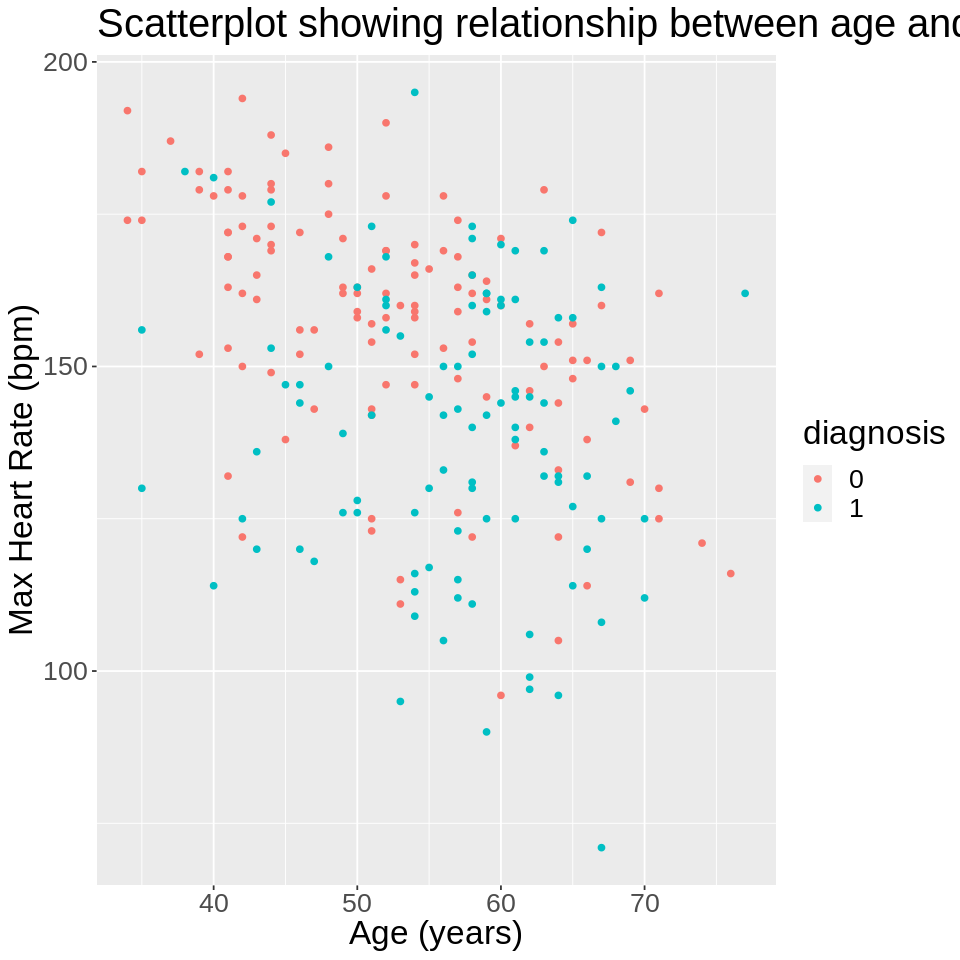

In [23]:
#Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do

#scattor plot showing elationship between age and resting blood pressure, categorised by target.
options(repr.plot.width = 8, repr.plot.height = 8) 
age_resting_point <- heart_train |>
    ggplot(aes(x = age, y = max_heart_rate))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Max Heart Rate (bpm)")+
    ggtitle("Scatterplot showing relationship between age and maximum heart rate, categorised by diagnosis")+
    theme(text = element_text(size = 20))
age_resting_point

#0 = negative diagnosis. 1 = positive diagnosis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



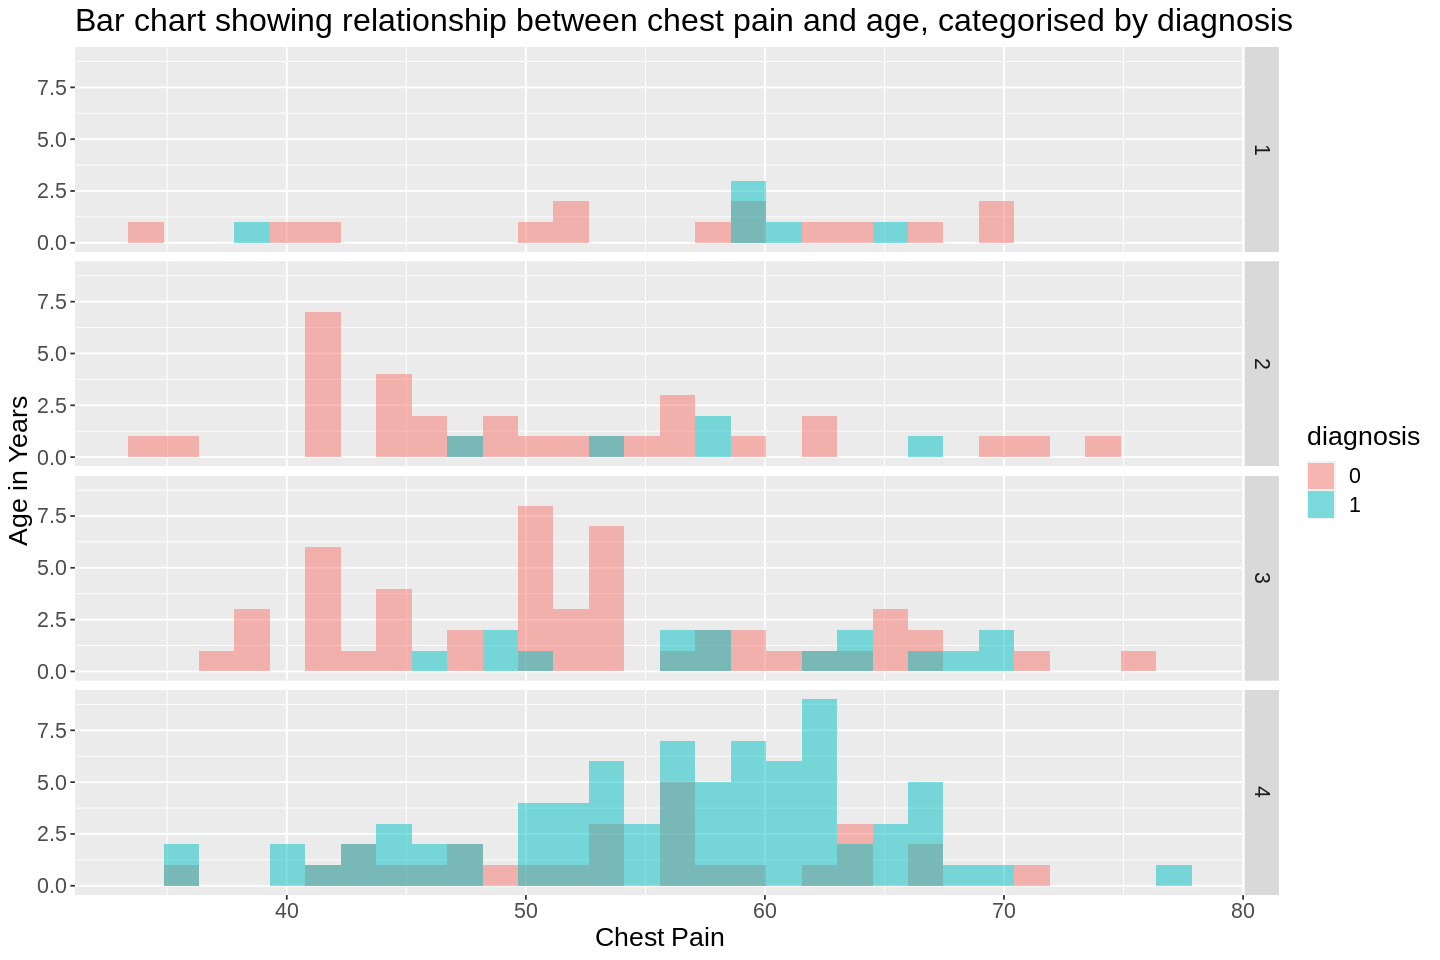

In [24]:
#bar chart showing the relations between sex and cholestrol, categorised by target
options(repr.plot.width = 12, repr.plot.height = 8) 
sex_chol_bar <- heart_train |>
    ggplot(aes(x = age, fill = diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    facet_grid(rows = vars(chest_pain))+
    labs(x = "Chest Pain", y = "Age in Years")+
    ggtitle("Bar chart showing relationship between chest pain and age, categorised by diagnosis")+
    theme(text = element_text(size = 16))
sex_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

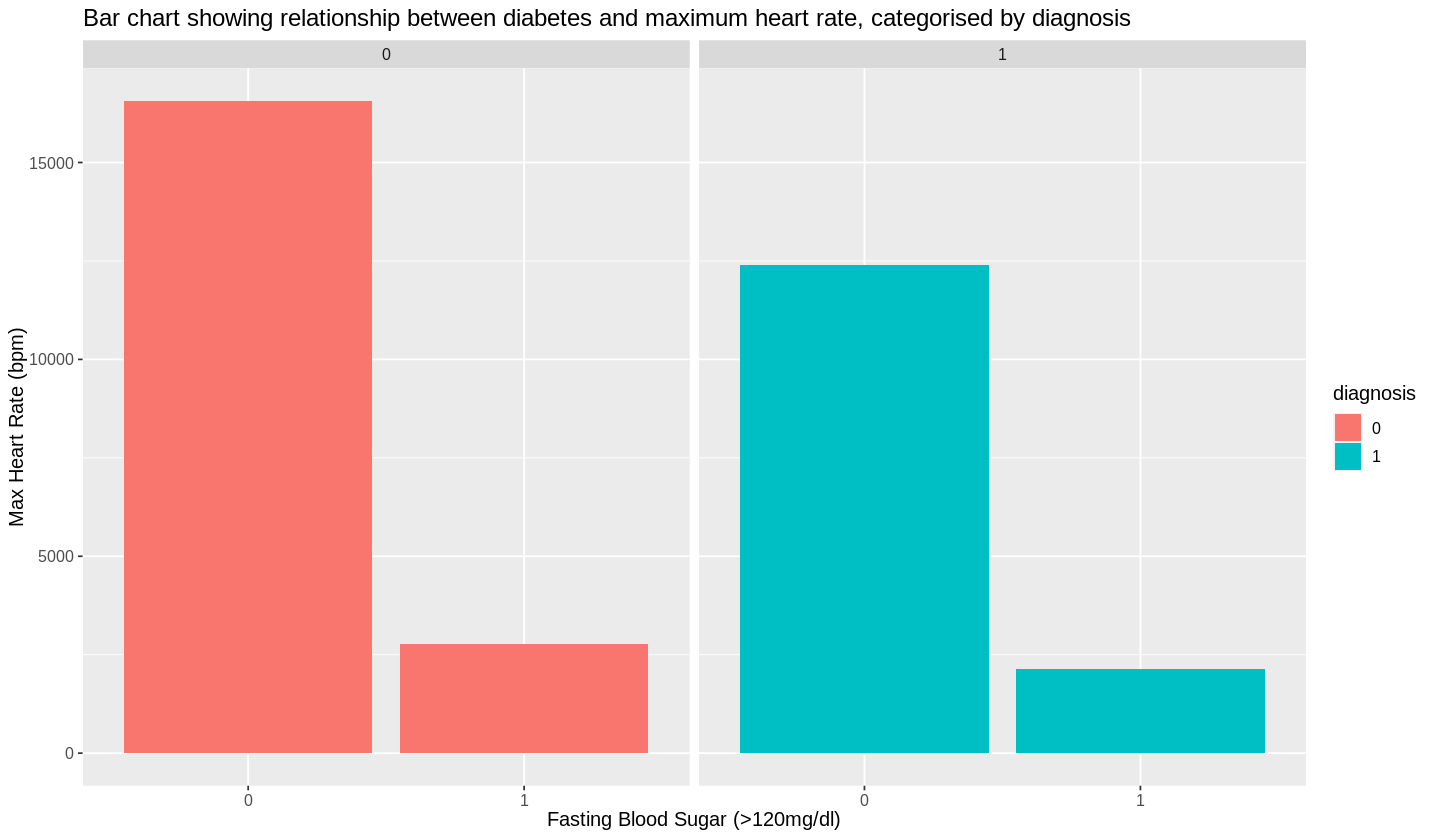

In [25]:
options(repr.plot.width = 12, repr.plot.height = 7) 
sugar_heart_bar <- heart_train |>
    ggplot(aes(x = fasting_blood_sugar, y = max_heart_rate, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Fasting Blood Sugar (>120mg/dl)", y = "Max Heart Rate (bpm)")+
    ggtitle("Bar chart showing relationship between diabetes and maximum heart rate, categorised by diagnosis")+
    theme(text = element_text(size = 12))
sugar_heart_bar

#0 = negative diagnosis. 1 = positive diagnosis.
#False = absence diabetes. True = presence of diabetes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



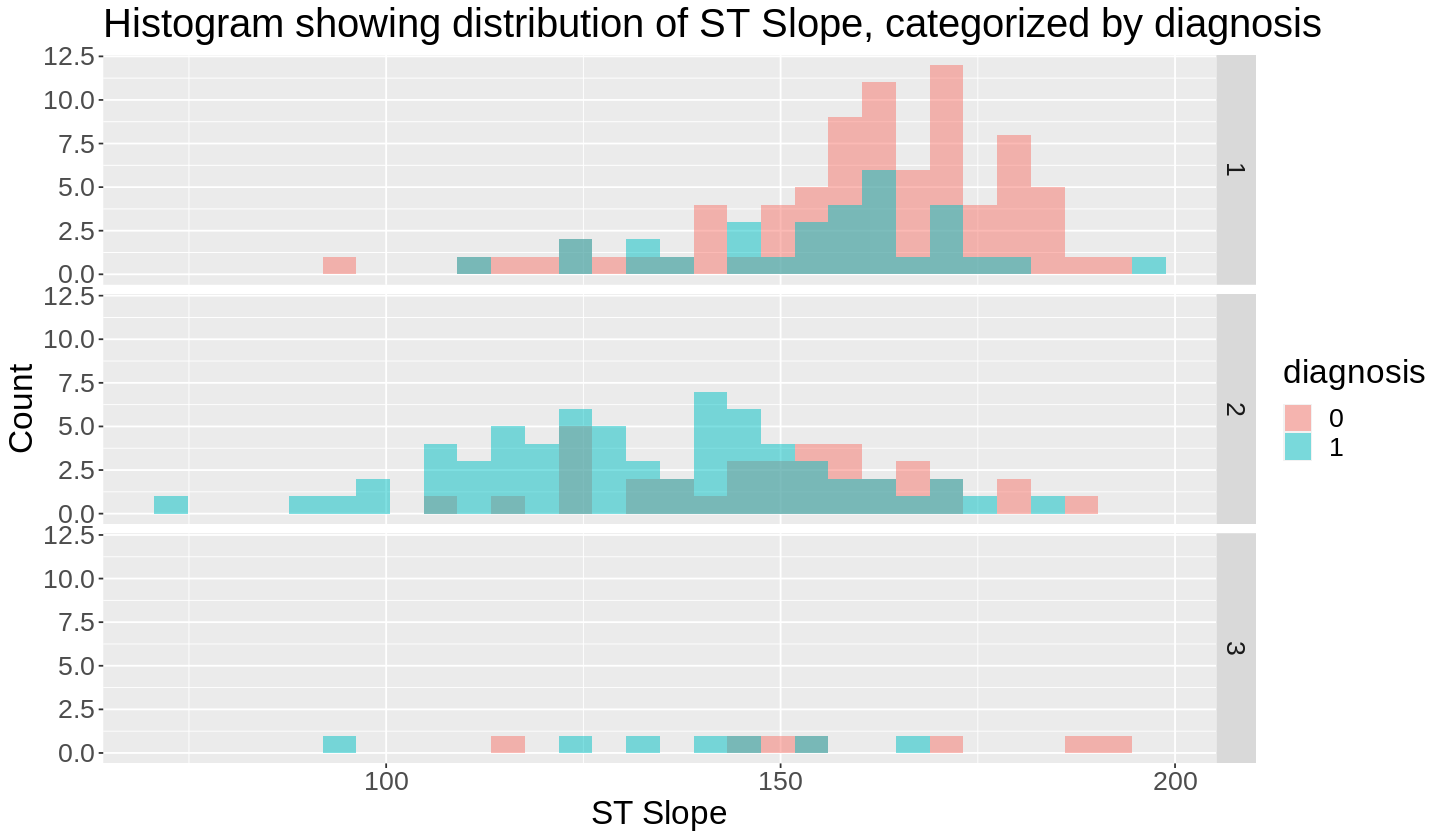

In [27]:
options(repr.plot.width = 12, repr.plot.height = 7)

max_slope_hist <- heart_train %>%
  ggplot(aes(x = max_heart_rate, fill = diagnosis)) +
  geom_histogram(alpha = 0.5, position = "identity") +
  facet_grid(rows = vars(ST_slope)) +
  labs(x = "ST Slope", y = "Count") +
  ggtitle("Histogram showing distribution of ST Slope, categorized by diagnosis") +
  theme(text = element_text(size = 20))

max_slope_hist


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



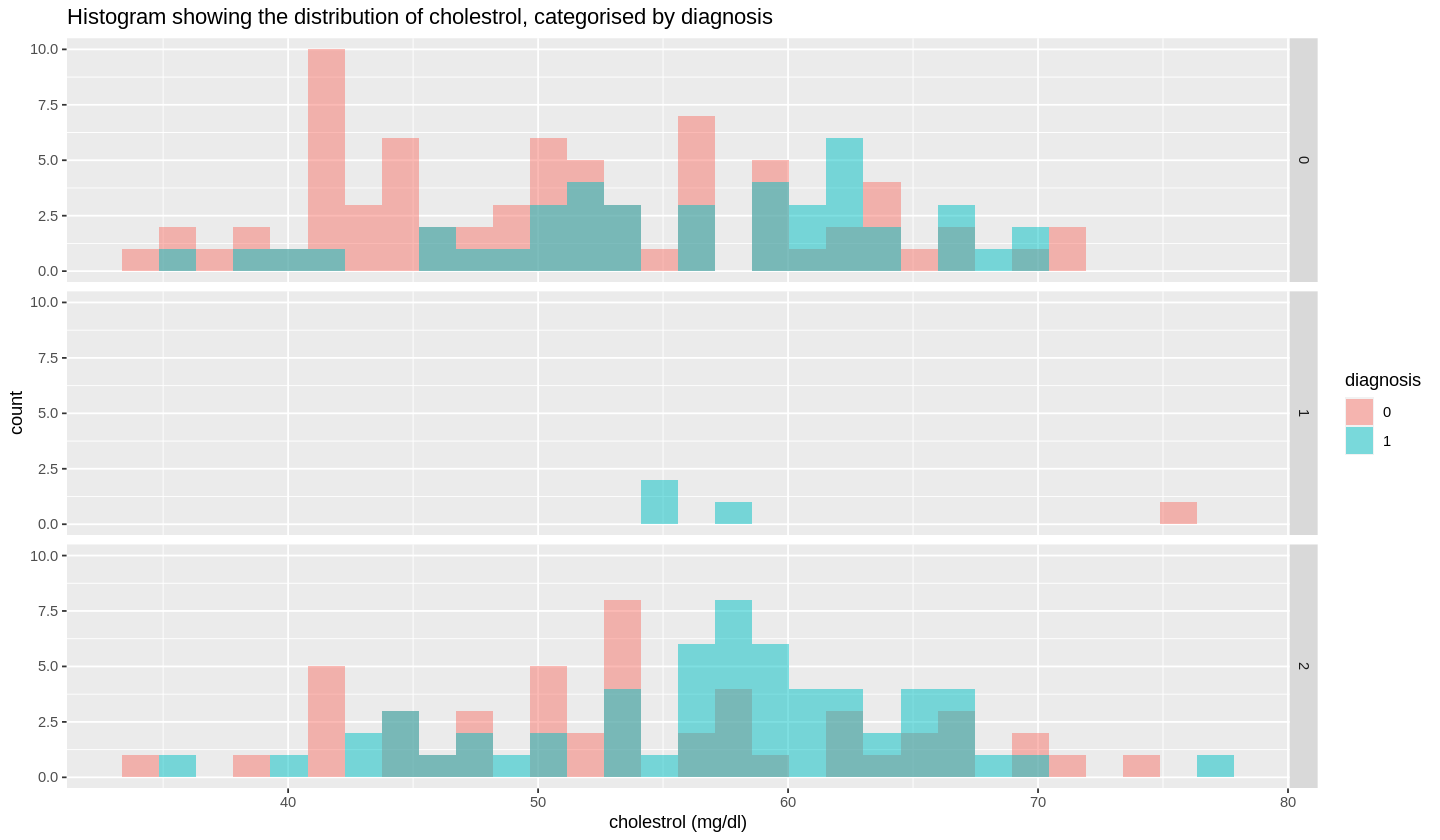

In [28]:
options(repr.plot.width = 12, repr.plot.height = 7) 
slope_hist <- heart_train |>
    ggplot(aes(x = age, fill = diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    facet_grid(rows = vars(rest_ecg)) +
    labs(x = "cholestrol (mg/dl)")+
    ggtitle("Histogram showing the distribution of cholestrol, categorised by diagnosis")
    theme(text = element_text(size = 20))
slope_hist

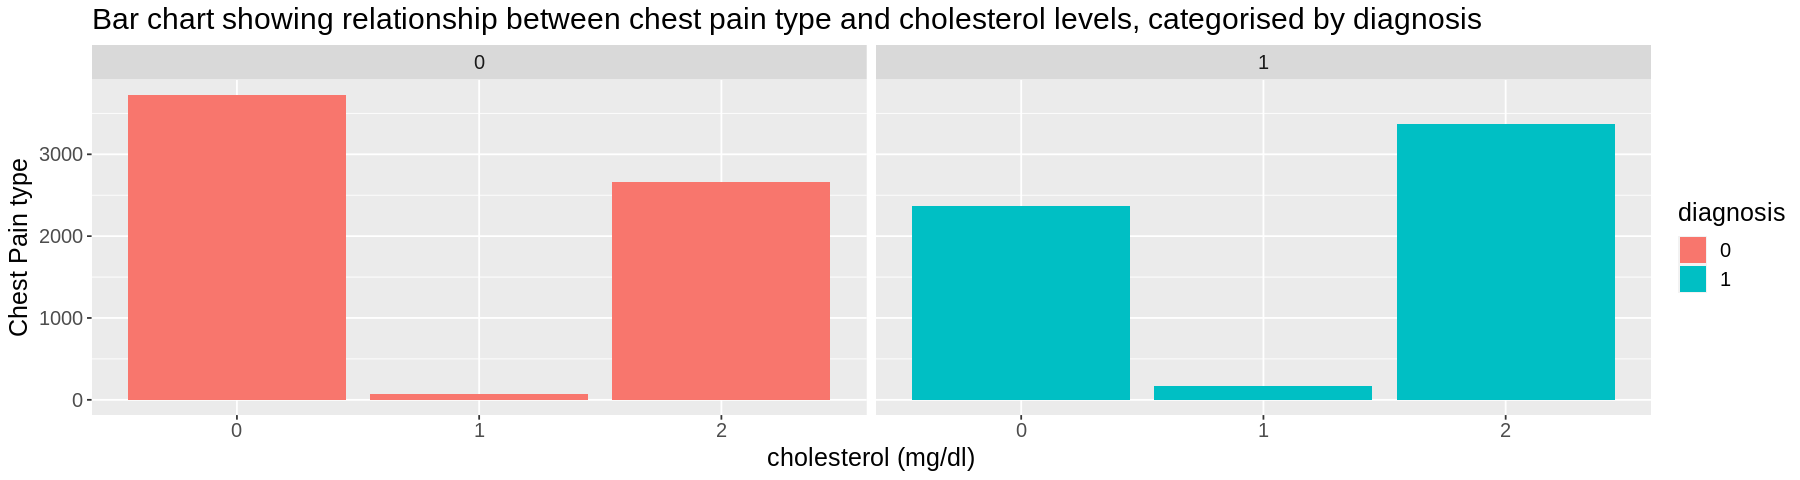

In [29]:
#bar chart showing relationship between chest pain type and cholesterol, categorised by diagnosis
options(repr.plot.width = 15, repr.plot.height = 4) 
chest_chol_bar <- heart_train |>
    ggplot(aes(x = age, y = rest_ecg, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Chest Pain type", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between chest pain type and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 15))

chest_chol_bar <- chest_chol_bar+coord_flip()
chest_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

**Finding best K neighbors value and plotting accuracy vs. k-value** 

In [30]:
heart_select_scale <- heart_train |>
    select(chest_pain, resting_blood_pressure, exercise_induced_angina, ST_slope, age, sex, rest_ecg, diagnosis)
heart_select_scale

,chest_pain,resting_blood_pressure,exercise_induced_angina,ST_slope,age,sex,rest_ecg,diagnosis
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,1,145,0,3,63,1,2,0
4,3,130,0,3,37,1,0,0
5,2,130,0,1,41,0,2,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
298,4,140,1,2,57,0,0,1
300,4,144,0,2,68,1,0,1
301,4,130,1,2,57,1,0,1


Warning message:
“tune samples were requested but there were 227 rows in the data. 222 will be used.”


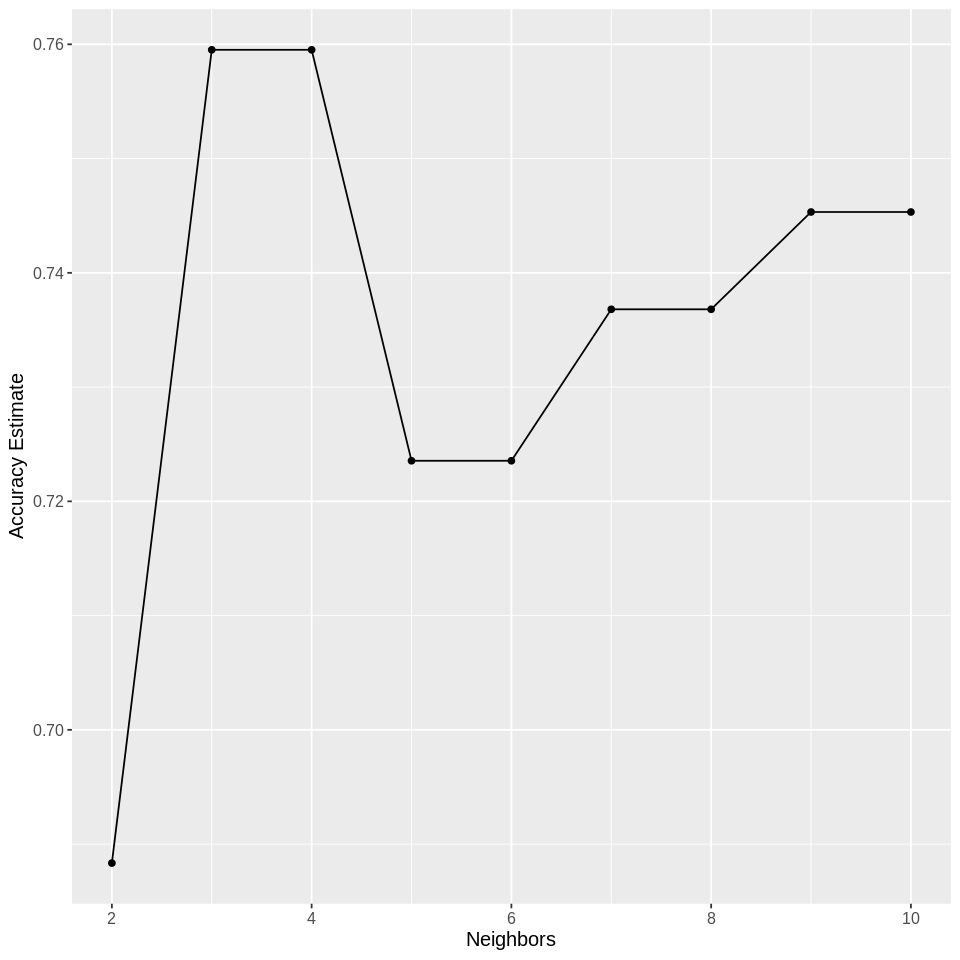

In [31]:
set.seed(20)
options(repr.plot.width = 8, repr.plot.height = 8) 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

recipe <- recipe(diagnosis ~., data = heart_select_scale) |>
                        step_scale(all_numeric()) |>
                        step_center(all_numeric()) |> 
    step_dummy(chest_pain, exercise_induced_angina, ST_slope, rest_ecg, sex)

fit <- workflow() |>
                    add_recipe(recipe) |>
                    add_model(knn_spec) |>
                    fit(data = heart_select_scale)

train_vfold <- vfold_cv(heart_select_scale, v = 10, strata = diagnosis)

k_lots <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = train_vfold, grid = k_lots) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
cross_val_plot

Number of k neighbours selected: 4

**Create model with best predictors and best k-value**

In [32]:
heart_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = 4)|>
set_engine("kknn")|>
set_mode("classification")

heart_fit <- workflow()|>
add_recipe(recipe)|>
add_model(heart_spec)|>
fit(data=heart_select_scale)

**Use test data with predictor model, display with table.**

In [33]:
heart_predictions <- predict(heart_fit, heart_test)|>
    bind_cols(heart_test)

heart_metrics <- heart_predictions|>
    metrics(truth = diagnosis, estimate = .pred_class)
heart_metrics

heart_conf_mat <- heart_predictions|>
    conf_mat(truth = diagnosis ,estimate = .pred_class)

heart_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8026316
kap,binary,0.6019553


          Truth
Prediction  0  1
         0 34  8
         1  7 27

**Discussion**

From our data analysis using K-nearest neighbors classification, we found that our binary estimator had an accuracy of about 57.14%. This is quite a low accuracy, as in this course we have discussed how even accuracies of 80% and greater may not be sufficient in producing high-value results. 

Based on the method we used pick predictors for our classification model, our group would have expected to have a higher accuracy result. 

Our findings could be impacted by our methods, since we used google to help us use tools learned during the regression portion of this course to find correlations between variables. In attempting to go beyond the scope of the course and apply our knowledge in novel ways, there is a possibility of error occuring on our end. An alternative method would have been to do more background research on the greatest known health symptoms corresponding to heart disease, and then manually selecting our predictors based on this background knowledge. 

There is a great potential for future questioning from the basis of data science project. For example, we can test our classification model to diagnosis the health conditions of new patients (outside of the database) and thus assign them a health condition that corresponds to their symptoms and current physiological state. There are also broader applications of a project like this, specifically in the realm of medicine and healthcare. There is a growing standardization and implementation of data and computer science models into healthcare workflows - making the diagnosis and treatment process for patients much more efficient. After all, in theory, a highly well trained model with high accuracy may outcompete a tired, overworked physician when it comes to accurately creating a diagnosis and treatment plan. This was once thought to be a futuristic idea, but the power of data and computer science is undeniable, and there is great promise that it may change the state of modern healthcare.

*Explanation for predictor choices:* 

We didn't use forward selection as mentioned in our proposal, a TA advised us not to as it was beyond the scope of this course. Thus, we set out to find another way to choose our best predictors without having to test the accuracy of 479001600 predictor combonations by hand. A quick google search led us to understand we can use what we learned in regression to view the correlations between varibles and use that to pick our predictors for classification (Carvalho et. al, 2019). Using the leaps package, an article by Atinakarim on medium walked us through how to do this (2021).  


**References** 

Atinakarim. (2021, May 25). Selecting the best predictors for linear regression in R. Medium. https://towardsdatascience.com/selecting-the-best-predictors-for-linear-regression-in-r-f385bf3d93e9 

Carvalho, P., López, D., &amp; Alex2006. (2019, April). How to determine which are the best predictor variables given a known classification?. Cross Validated. https://stats.stackexchange.com/questions/399711/how-to-determine-which-are-the-best-predictor-variables-given-a-known-classifica 

Lumley, T. (Version 3.1). leaps: Regression Subset Selection [Computer software]. Retrieved from CRAN. URL: https://rdrr.io/cran/leaps/

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. 
https://doi.org/10.24432/C52P4X.


.